In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
matches_df = pd.read_csv('match_data_2008_2023.csv')

In [3]:
matches_df.head()

,Unnamed: 0,balls_per_over,city,dates,match_referees,reserve_umpires,tv_umpires,umpires,winner,player_of_match,toss_decision,toss_winner,venue,team_a,team_b,target_overs,target_runs
0,0,6,Hyderabad,2017-04-05,J Srinath,N Pandit,A Deshmukh,"AY Dandekar, NJ Llong",Sunrisers Hyderabad,Yuvraj Singh,field,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,20.0,208
1,1,6,Pune,2017-04-06,M Nayyar,Navdeep Singh,VK Sharma,"A Nand Kishore, S Ravi",Rising Pune Supergiant,SPD Smith,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,Rising Pune Supergiant,Mumbai Indians,20.0,185
2,2,6,Rajkot,2017-04-07,V Narayan Kutty,K Srinivasan,YC Barde,"Nitin Menon, CK Nandan",Kolkata Knight Riders,CA Lynn,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,Gujarat Lions,Kolkata Knight Riders,20.0,184
3,3,6,Indore,2017-04-08,Chinmay Sharma,R Pandit,KN Ananthapadmanabhan,"AK Chaudhary, C Shamshuddin",Kings XI Punjab,GJ Maxwell,field,Kings XI Punjab,Holkar Cricket Stadium,Kings XI Punjab,Rising Pune Supergiant,20.0,164
4,4,6,Bengaluru,2017-04-08,J Srinath,Navdeep Singh,A Nand Kishore,"S Ravi, VK Sharma",Royal Challengers Bangalore,KM Jadhav,bat,Royal Challengers Bangalore,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,20.0,158


In [4]:
matches_df.shape

(1024, 17)

In [5]:
matches_df.describe()

,Unnamed: 0,balls_per_over,target_overs,target_runs
count,1024.00000,1024.0,1024.000000,1024.000000
mean,511.50000,6.0,19.688672,163.471680
std,295.74764,0.0,1.946345,33.504281
min,0.00000,6.0,0.000000,0.000000
25%,255.75000,6.0,20.000000,144.750000
50%,511.50000,6.0,20.000000,165.000000
75%,767.25000,6.0,20.000000,185.000000
max,1023.00000,6.0,20.000000,264.000000


In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1024 non-null   int64  
 1   balls_per_over   1024 non-null   int64  
 2   city             973 non-null    object 
 3   dates            1024 non-null   object 
 4   match_referees   1024 non-null   object 
 5   reserve_umpires  1000 non-null   object 
 6   tv_umpires       1021 non-null   object 
 7   umpires          1024 non-null   object 
 8   winner           1005 non-null   object 
 9   player_of_match  1019 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  toss_winner      1024 non-null   object 
 12  venue            1024 non-null   object 
 13  team_a           1024 non-null   object 
 14  team_b           1024 non-null   object 
 15  target_overs     1024 non-null   float64
 16  target_runs      1024 non-null   int64  
dtypes: float64(1),

In [7]:
matches_df.fillna(value='NA', inplace=True)

In [8]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1024 non-null   int64  
 1   balls_per_over   1024 non-null   int64  
 2   city             1024 non-null   object 
 3   dates            1024 non-null   object 
 4   match_referees   1024 non-null   object 
 5   reserve_umpires  1024 non-null   object 
 6   tv_umpires       1024 non-null   object 
 7   umpires          1024 non-null   object 
 8   winner           1024 non-null   object 
 9   player_of_match  1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  toss_winner      1024 non-null   object 
 12  venue            1024 non-null   object 
 13  team_a           1024 non-null   object 
 14  team_b           1024 non-null   object 
 15  target_overs     1024 non-null   float64
 16  target_runs      1024 non-null   int64  
dtypes: float64(1),

In [9]:
matches_df['dates'] = pd.to_datetime(matches_df['dates'])


In [10]:
# Convert the 'date' column to datetime format
matches_df['dates'] = matches_df['dates'].apply(lambda x: pd.to_datetime(x))

# Sort the DataFrame by the 'date' column
matches_df.sort_values('dates', inplace=True)

# Reset the index after sorting
matches_df.reset_index(inplace=True, drop=True)


In [11]:
# Drop redundant columns
matches_df = matches_df.drop(['Unnamed: 0', 'balls_per_over'], axis=1)

In [12]:
old_stad_new_stad_dict = {
    'Punjab Cricket Association IS Bindra Stadium':'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
    'Feroz Shah Kotla':'Feroz Shah Kotla Ground',
    'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium',
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Brabourne Stadium':'Brabourne Stadium, Mumbai',
    'Dr DY Patil Sports Academy':'Dr DY Patil Sports Academy, Mumbai',
    'Eden Gardens':'Eden Gardens, Kolkata',
    'Himachal Pradesh Cricket Association Stadium':'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'M Chinnaswamy Stadium':'M Chinnaswamy Stadium, Bengaluru',
    'M.Chinnaswamy Stadium':'M Chinnaswamy Stadium, Bengaluru',
    'MA Chidambaram Stadium':'MA Chidambaram Stadium, Chepauk',
    'MA Chidambaram Stadium, Chepauk, Chennai':'MA Chidambaram Stadium, Chepauk',
    'Maharashtra Cricket Association Stadium':'Maharashtra Cricket Association Stadium, Pune',
    'Rajiv Gandhi International Stadium':'Rajiv Gandhi International Stadium, Uppal',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad':'Rajiv Gandhi International Stadium, Uppal',
    'Sawai Mansingh Stadium':'Sawai Mansingh Stadium, Jaipur',
    'Wankhede Stadium':'Wankhede Stadium, Mumbai'
  }

old_city_new_city_dict = {
    'Bengaluru':'Bangalore',
    'Navi Mumbai':'Mumbai'
  }

def change_name(team_name, old_name_new_name_dict):
    if team_name in old_name_new_name_dict.keys():
        return old_name_new_name_dict[team_name]
    return team_name

matches_df['venue'] = matches_df['venue'].apply(lambda x: change_name(x, old_stad_new_stad_dict))
matches_df['city'] = matches_df['city'].apply(lambda x: change_name(x, old_city_new_city_dict))


In [13]:
matches_df

,city,dates,match_referees,reserve_umpires,tv_umpires,umpires,winner,player_of_match,toss_decision,toss_winner,venue,team_a,team_b,target_overs,target_runs
0,Bangalore,2008-04-18,J Srinath,VN Kulkarni,AM Saheba,"Asad Rauf, RE Koertzen",Kolkata Knight Riders,BB McCullum,field,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,20.0,223
1,Chandigarh,2008-04-19,S Venkataraghavan,MSS Ranawat,RB Tiffin,"MR Benson, SL Shastri",Chennai Super Kings,MEK Hussey,bat,Chennai Super Kings,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,Chennai Super Kings,20.0,241
2,Delhi,2008-04-19,GR Viswanath,NA,IL Howell,"Aleem Dar, GA Pratapkumar",Delhi Daredevils,MF Maharoof,bat,Rajasthan Royals,Feroz Shah Kotla Ground,Delhi Daredevils,Rajasthan Royals,20.0,130
3,Mumbai,2008-04-20,J Srinath,SN Bandekar,AV Jayaprakash,"SJ Davis, DJ Harper",Royal Challengers Bangalore,MV Boucher,bat,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,Royal Challengers Bangalore,20.0,166
4,Kolkata,2008-04-20,FM Engineer,F Gomes,Asad Rauf,"BF Bowden, K Hariharan",Kolkata Knight Riders,DJ Hussey,bat,Deccan Chargers,"Eden Gardens, Kolkata",Kolkata Knight Riders,Deccan Chargers,20.0,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,Bangalore,2023-05-21,J Srinath,VM Dhokre,Tapan Sharma,"Nitin Menon, VK Sharma",Gujarat Titans,Shubman Gill,field,Gujarat Titans,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Gujarat Titans,20.0,198
1020,Chennai,2023-05-23,M Nayyar,VK Sharma,BNJ Oxenford,"AK Chaudhary, CB Gaffaney",Chennai Super Kings,RD Gaikwad,field,Gujarat Titans,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Gujarat Titans,20.0,173
1021,Chennai,2023-05-24,V Narayan Kutty,AK Chaudhary,CB Gaffaney,"BNJ Oxenford, VK Sharma",Mumbai Indians,Akash Madhwal,bat,Mumbai Indians,"MA Chidambaram Stadium, Chepauk",Mumbai Indians,Lucknow Super Giants,20.0,183
1022,Ahmedabad,2023-05-26,J Srinath,KN Ananthapadmanabhan,J Madanagopal,"Nitin Menon, RJ Tucker",Gujarat Titans,Shubman Gill,field,Mumbai Indians,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Mumbai Indians,20.0,234


In [14]:
matches_df.shape

(1024, 15)

In [15]:
old_team_name_new_name_dict = {
    'Deccan Chargers' :'Sunrisers Hyderabad', 
    'Delhi Daredevils':'Delhi Capitals',
    'Gujarat Lions': 'Gujarat Titans',
    'Kings XI Punjab':'Punjab Kings'
    }


for column in ['team_a','team_b','toss_winner','winner']: 
  matches_df[column] = matches_df[column].apply(lambda x: change_name(x, old_team_name_new_name_dict))

In [16]:
matches_df.shape

(1024, 15)

In [17]:

# Assuming you have a list of teams playing in 2024
teams_2024 = ['Kolkata Knight Riders', 'Rajasthan Royals', 'Gujarat Titans', 'Chennai Super Kings', 'Lucknow Super Giants', 'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Punjab Kings']

# Filter the rows based on teams in 2024
matches_df = matches_df[matches_df['team_a'].isin(teams_2024) & matches_df['team_b'].isin(teams_2024)]

# Reset the index after making changes
matches_df.reset_index(inplace=True, drop=True)

In [18]:
matches_df.shape

(935, 15)

In [19]:
matches_df.head()

,city,dates,match_referees,reserve_umpires,tv_umpires,umpires,winner,player_of_match,toss_decision,toss_winner,venue,team_a,team_b,target_overs,target_runs
0,Bangalore,2008-04-18,J Srinath,VN Kulkarni,AM Saheba,"Asad Rauf, RE Koertzen",Kolkata Knight Riders,BB McCullum,field,Royal Challengers Bangalore,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,20.0,223
1,Chandigarh,2008-04-19,S Venkataraghavan,MSS Ranawat,RB Tiffin,"MR Benson, SL Shastri",Chennai Super Kings,MEK Hussey,bat,Chennai Super Kings,"Punjab Cricket Association IS Bindra Stadium, ...",Punjab Kings,Chennai Super Kings,20.0,241
2,Delhi,2008-04-19,GR Viswanath,NA,IL Howell,"Aleem Dar, GA Pratapkumar",Delhi Capitals,MF Maharoof,bat,Rajasthan Royals,Feroz Shah Kotla Ground,Delhi Capitals,Rajasthan Royals,20.0,130
3,Mumbai,2008-04-20,J Srinath,SN Bandekar,AV Jayaprakash,"SJ Davis, DJ Harper",Royal Challengers Bangalore,MV Boucher,bat,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,Royal Challengers Bangalore,20.0,166
4,Kolkata,2008-04-20,FM Engineer,F Gomes,Asad Rauf,"BF Bowden, K Hariharan",Kolkata Knight Riders,DJ Hussey,bat,Sunrisers Hyderabad,"Eden Gardens, Kolkata",Kolkata Knight Riders,Sunrisers Hyderabad,20.0,111


In [20]:
matches_df.sort_values('team_a', inplace=True)

# Reset the index after sorting
matches_df.reset_index(inplace=True, drop=True)

In [21]:
matches_df.head()

,city,dates,match_referees,reserve_umpires,tv_umpires,umpires,winner,player_of_match,toss_decision,toss_winner,venue,team_a,team_b,target_overs,target_runs
0,Ranchi,2015-05-22,RS Mahanama,K Srinath,C Shamshuddin,"AK Chaudhary, CB Gaffaney",Chennai Super Kings,A Nehra,field,Chennai Super Kings,JSCA International Stadium Complex,Chennai Super Kings,Royal Challengers Bangalore,20.0,140
1,Chennai,2015-05-08,RR Jadeja,Nitin Menon,K Srinath,"CB Gaffaney, CK Nandan",Mumbai Indians,HH Pandya,bat,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,20.0,159
2,Chennai,2023-04-03,M Nayyar,PM Joshi,UV Gandhe,"A Totre, BNJ Oxenford",Chennai Super Kings,MM Ali,field,Lucknow Super Giants,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Lucknow Super Giants,20.0,218
3,Chennai,2011-04-16,Raju Mukherjee,K Srinath,K Hariharan,"HDPK Dharmasena, AL Hill",Chennai Super Kings,MEK Hussey,bat,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bangalore,20.0,184
4,Chennai,2013-04-25,AJ Pycroft,K Srinivasan,C Shamshuddin,"Aleem Dar, S Das",Chennai Super Kings,MS Dhoni,bat,Sunrisers Hyderabad,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Sunrisers Hyderabad,20.0,160


In [22]:
label_encoder = LabelEncoder()

categorical_columns = ['city','match_referees', 'reserve_umpires', 'tv_umpires', 'umpires','winner',
                        'player_of_match', 'toss_decision', 'toss_winner', 'venue', 'team_a', 'team_b']

for column in categorical_columns:
    matches_df[column] = label_encoder.fit_transform(matches_df[column])

matches_df['dates'] = pd.to_datetime(matches_df['dates'])


In [23]:
matches_df

,city,dates,match_referees,reserve_umpires,tv_umpires,umpires,winner,player_of_match,toss_decision,toss_winner,venue,team_a,team_b,target_overs,target_runs
0,30,2015-05-22,18,24,14,21,0,3,1,0,15,0,8,20.0,140
1,7,2015-05-08,16,40,31,147,5,75,0,0,18,0,5,20.0,159
2,7,2023-04-03,11,44,64,13,0,147,1,4,18,0,4,20.0,218
3,7,2011-04-16,20,24,30,190,0,139,0,0,18,0,8,20.0,184
4,7,2013-04-25,0,25,14,67,0,153,0,9,18,0,9,20.0,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,24,2014-04-27,8,22,8,40,0,60,0,9,31,9,0,20.0,146
931,24,2014-04-25,8,25,10,265,10,13,0,9,9,9,1,20.0,185
932,0,2020-09-26,26,61,54,164,3,244,0,9,32,9,3,20.0,143
933,7,2019-04-23,28,36,65,32,0,235,1,0,18,9,0,20.0,176


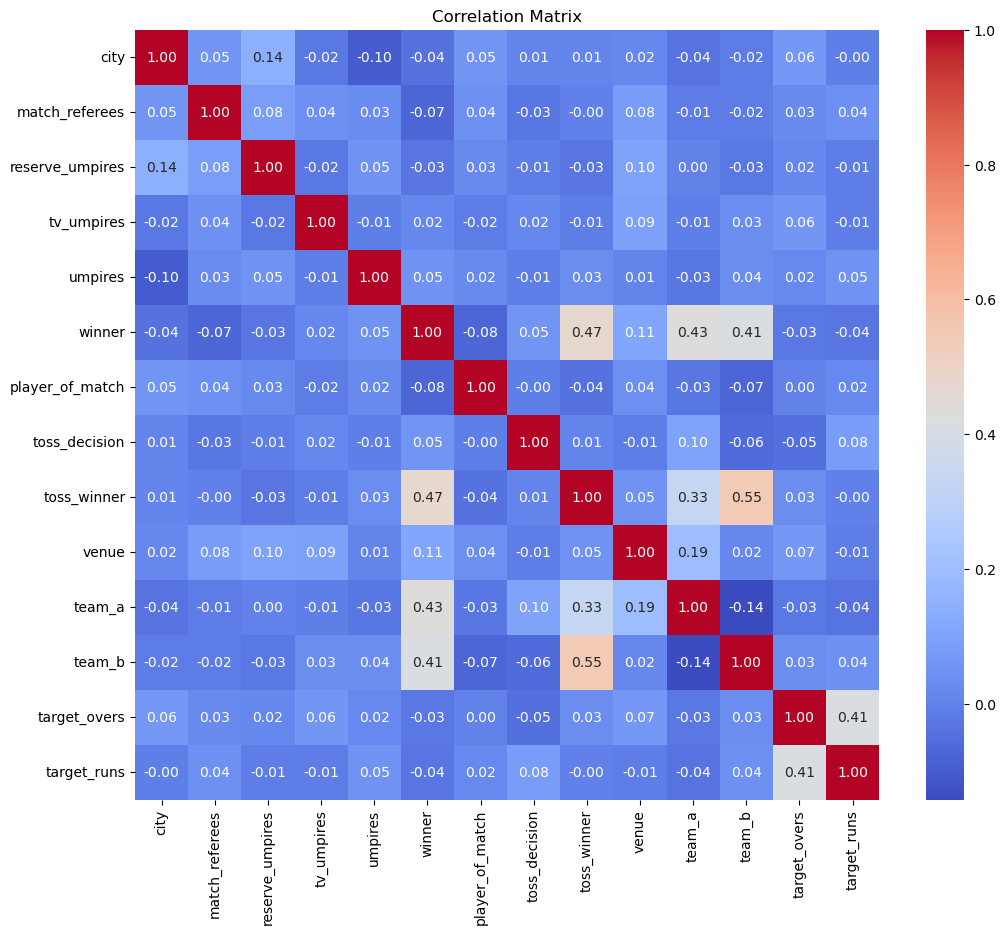

In [24]:

correlation_matrix = matches_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
# Assuming 'df' is your preprocessed DataFrame

# Calculate the correlation of each feature with the 'winner' column
correlation_with_winner = matches_df.corr()['winner'].abs()

# Set a threshold for correlation strength (you can adjust this threshold based on your requirements)
correlation_threshold = 0.07

# Identify columns with correlation below the threshold and drop them
irrelevant_columns = correlation_with_winner[correlation_with_winner < correlation_threshold].index
matches_df = matches_df.drop(columns=irrelevant_columns)

# Now 'df' contains only relevant columns


In [26]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dates            935 non-null    datetime64[ns]
 1   match_referees   935 non-null    int32         
 2   winner           935 non-null    int32         
 3   player_of_match  935 non-null    int32         
 4   toss_winner      935 non-null    int32         
 5   venue            935 non-null    int32         
 6   team_a           935 non-null    int32         
 7   team_b           935 non-null    int32         
dtypes: datetime64[ns](1), int32(7)
memory usage: 33.0 KB


In [27]:
matches_df.head()

,dates,match_referees,winner,player_of_match,toss_winner,venue,team_a,team_b
0,2015-05-22,18,0,3,0,15,0,8
1,2015-05-08,16,5,75,0,18,0,5
2,2023-04-03,11,0,147,4,18,0,4
3,2011-04-16,20,0,139,0,18,0,8
4,2013-04-25,0,0,153,9,18,0,9


In [28]:



X = matches_df.drop(columns=['winner'])
y = matches_df['winner']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [29]:
# Drop 'dates' column if not needed for prediction
X_train = X_train.drop(columns=['dates'])
X_test = X_test.drop(columns=['dates'])


In [30]:
# Initialize the SVM classifier
svm_classifier = SVC()

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.2099644128113879
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.56      0.38        45
           1       0.00      0.00      0.00        22
           2       0.00      0.00      0.00         9
           3       0.19      0.07      0.11        40
           4       0.00      0.00      0.00         6
           5       0.19      0.28      0.22        43
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        30
           8       0.18      0.39      0.25        23
           9       0.00      0.00      0.00        31
          10       0.16      0.34      0.22        29

    accuracy                           0.21       281
   macro avg       0.09      0.15      0.11       281
weighted avg       0.13      0.21      0.15       281



In [32]:
# Assuming 'X' is your feature matrix
pca = PCA(n_components=5)  # Choose the number of components based on the explained variance you want to retain
X = matches_df.drop(columns=['winner'])
X=X.drop(columns=['dates'])
X_pca = pca.fit_transform(X)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [34]:
# Initialize Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training set
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)


In [35]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 7.814758930239198
